In [1]:
 !wget -c https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz

--2023-12-15 16:10:21--  https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/octet-stream]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  35.1MB/s    in 10s     

2023-12-15 16:10:32 (31.8 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]



In [2]:
 !wget -c https://thor.robots.ox.ac.uk/datasets/flowers-102/imagelabels.mat

--2023-12-15 16:10:32--  https://thor.robots.ox.ac.uk/datasets/flowers-102/imagelabels.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502 [application/octet-stream]
Saving to: ‘imagelabels.mat’

imagelabels.mat     100%[===================>]     502  --.-KB/s    in 0s      

2023-12-15 16:10:33 (184 MB/s) - ‘imagelabels.mat’ saved [502/502]



In [3]:
!tar zxvf 102flowers.tgz

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

In [4]:
!ls ./jpg | wc -l

8189


In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from skimage.feature import hog
import joblib
from PIL import Image
import scipy.io
import cv2

mat = scipy.io.loadmat('imagelabels.mat')


In [6]:
image_dir = 'jpg'
image_files = os.listdir(image_dir)

# Create a list to store image paths
image_paths = [os.path.join(image_dir, img) for img in image_files]

# Define a function to extract features from the images
def preproccess_images(image_paths, target_size=(64, 64)):
    final_images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

        if img.shape[-1] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        final_images.append(img)

    return np.array(final_images)

def extract_features(images):
  features = []
  for img in images:
    img = hog(img, visualize=False)
    features.append(img)
  return features

features = extract_features(preproccess_images(image_paths))
labels = mat['labels'][0]



In [7]:
print(labels)

[77 77 77 ... 62 62 62]


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [14]:
num_total_samples = len(features)
num_train_samples = int(0.8 * num_total_samples)

# The remaining samples will be used for testing
num_test_samples = num_total_samples - num_train_samples

print("Number of training samples:", num_train_samples)
print("Number of testing samples:", num_test_samples)

Number of training samples: 6551
Number of testing samples: 1638


In [15]:
# Extract features from training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print('Training Score: ', model.score(X_train, y_train))
print('Testing Score: ', model.score(X_test, y_test))




Accuracy: 0.020146520146520148
Training Score:  0.5803694092504961
Testing Score:  0.017094017094017096


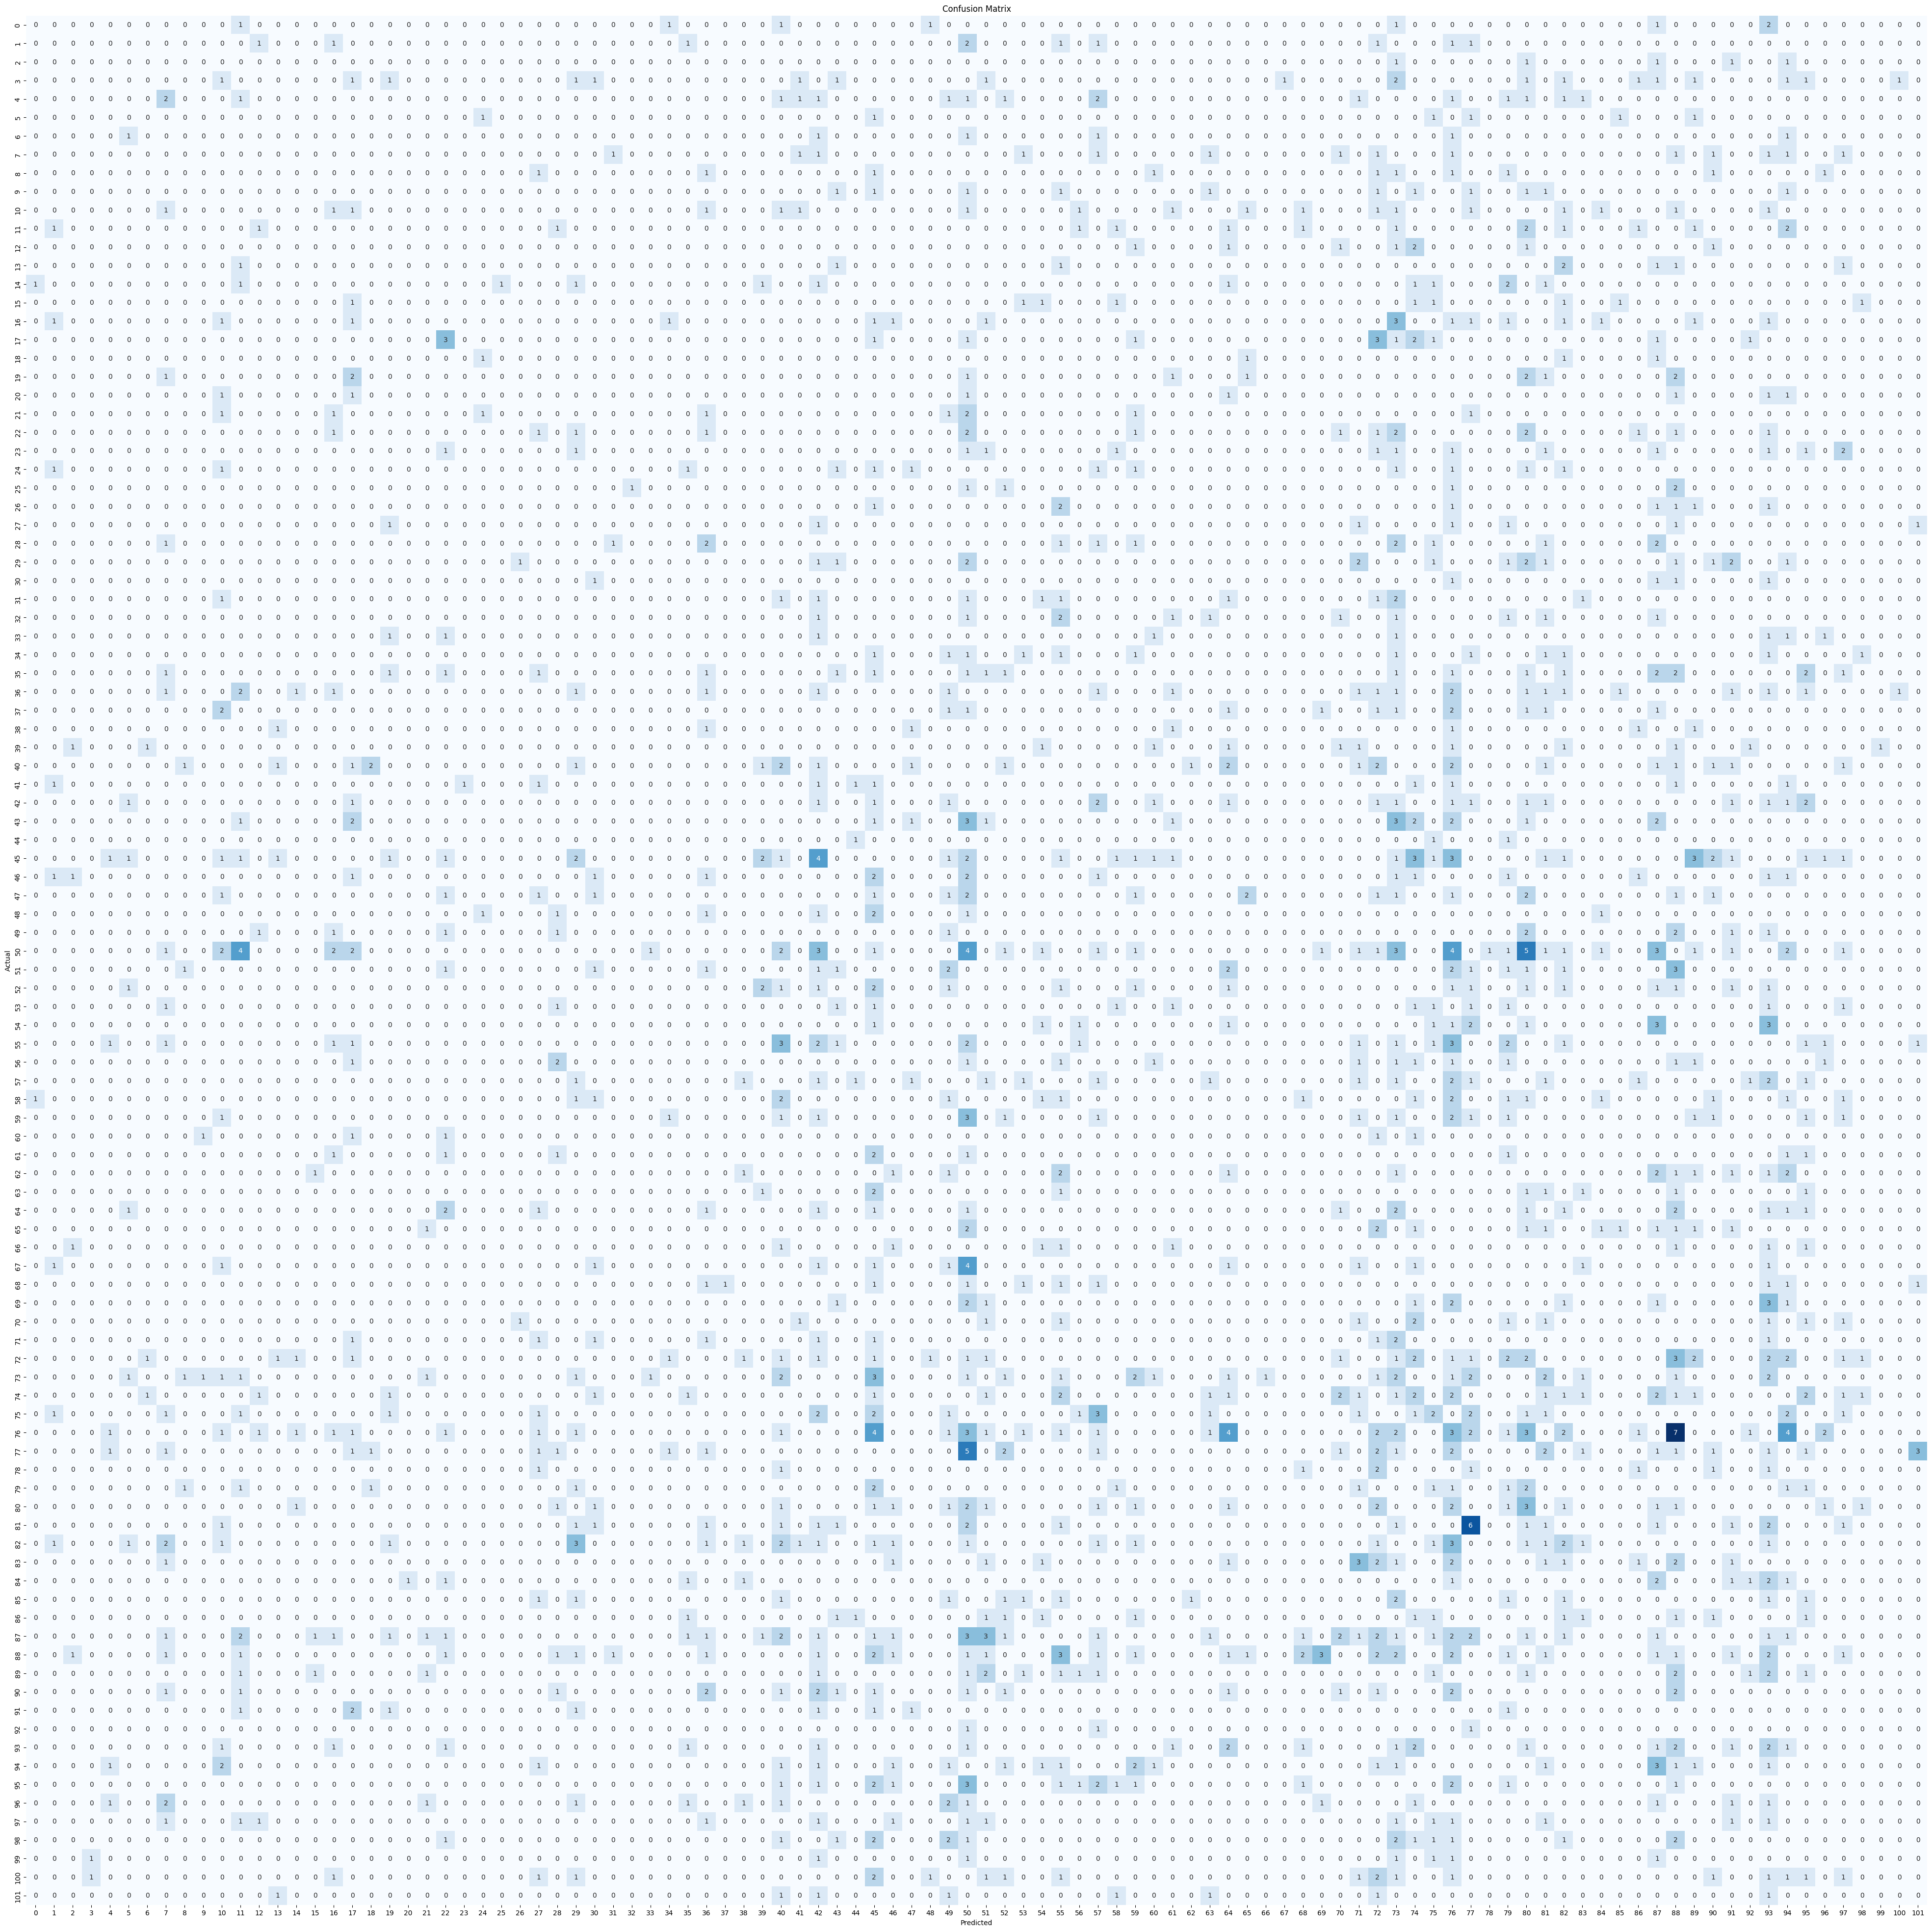

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(50, 50))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_probs = model.predict_proba(X_test_scaled)
class_names= np.unique(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


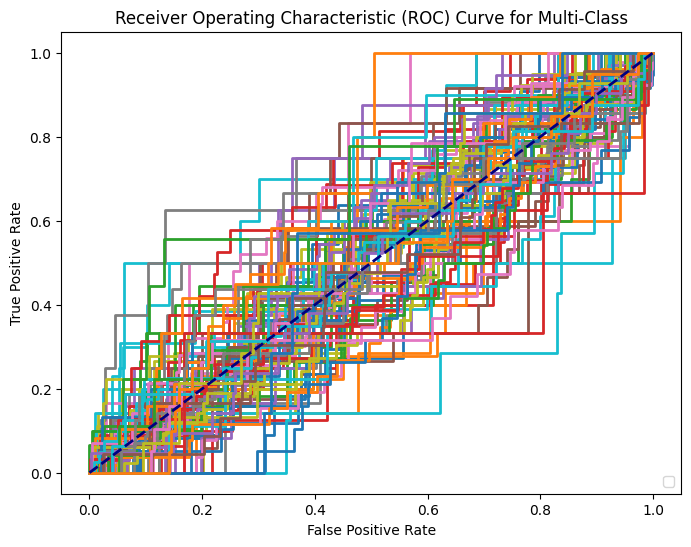

In [20]:
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()